<a href="https://colab.research.google.com/github/creatVish/Ecommerce-Sales-Analysis/blob/main/Ecommerce(FactT)ipynb.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [61]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [62]:
fact = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Odin Collab/ecommerce sales analysis/fact_table.csv')

In [63]:
fact.head()

,payment_key,coustomer_key,time_key,item_key,store_key,quantity,unit,unit_price,total_price
0,P026,C004510,T049189,I00177,S00307,1,ct,35.0,35.0
1,P022,C008967,T041209,I00248,S00595,1,rolls,26.0,26.0
2,P030,C007261,T03633,I00195,S00496,8,ct,12.5,100.0
3,P032,C007048,T084631,I00131,S0086,8,ct,14.0,112.0
4,P014,C006430,T071276,I00050,S00488,8,cans,8.0,64.0


In [64]:
fact.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype  
---  ------         --------------    -----  
 0   payment_key    1000000 non-null  object 
 1   coustomer_key  1000000 non-null  object 
 2   time_key       1000000 non-null  object 
 3   item_key       1000000 non-null  object 
 4   store_key      1000000 non-null  object 
 5   quantity       1000000 non-null  int64  
 6   unit           996277 non-null   object 
 7   unit_price     1000000 non-null  float64
 8   total_price    1000000 non-null  float64
dtypes: float64(2), int64(1), object(6)
memory usage: 68.7+ MB


In [65]:
fact.isnull().sum()

payment_key         0
coustomer_key       0
time_key            0
item_key            0
store_key           0
quantity            0
unit             3723
unit_price          0
total_price         0
dtype: int64

In [66]:
new_fact = fact[fact['unit'].isnull()]
fact['unit'].fillna(method='ffill', inplace=True)

In [67]:
fact.isnull().sum()

payment_key      0
coustomer_key    0
time_key         0
item_key         0
store_key        0
quantity         0
unit             0
unit_price       0
total_price      0
dtype: int64

In [68]:
fact.describe()

,quantity,unit_price,total_price
count,1000000.000000,1000000.000000,1000000.000000
mean,6.000185,17.561602,105.401436
std,3.161932,8.637097,80.829301
min,1.000000,6.000000,6.000000
25%,3.000000,13.000000,47.250000
50%,6.000000,16.000000,90.000000
75%,9.000000,20.000000,144.000000
max,11.000000,55.000000,605.000000


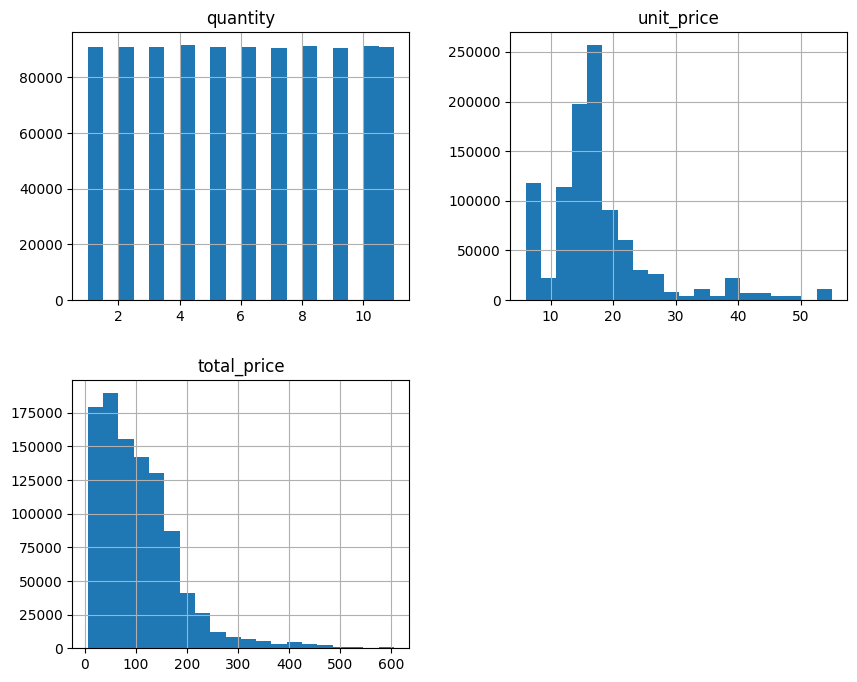

In [69]:
fact.hist(figsize=(10,8), bins=20)
plt.show()

In [70]:
fact['item_key'].value_counts()

I00015    3952
I00203    3939
I00082    3923
I00257    3920
I00230    3913
          ... 
I00168    3666
I00141    3665
I00068    3665
I00173    3659
I00051    3625
Name: item_key, Length: 264, dtype: int64

<Axes: xlabel='total_price'>

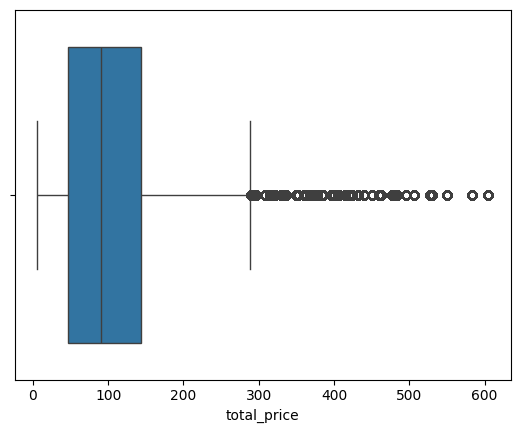

In [71]:
sns.boxplot(x='total_price', data=fact)

In [72]:
Q1 = fact['total_price'].quantile(0.25)
Q3 = fact['total_price'].quantile(0.75)
IQR = Q3 - Q1


In [73]:
outliers = (fact['total_price'] < Q1 - 1.5 * IQR) | fact['total_price'] > Q3 + 1.5 * IQR

In [74]:
outliers

0         False
1         False
2         False
3         False
4         False
          ...  
999995    False
999996    False
999997    False
999998    False
999999    False
Name: total_price, Length: 1000000, dtype: bool

In [75]:
fact.describe()

,quantity,unit_price,total_price
count,1000000.000000,1000000.000000,1000000.000000
mean,6.000185,17.561602,105.401436
std,3.161932,8.637097,80.829301
min,1.000000,6.000000,6.000000
25%,3.000000,13.000000,47.250000
50%,6.000000,16.000000,90.000000
75%,9.000000,20.000000,144.000000
max,11.000000,55.000000,605.000000


In [76]:
cleaned_data = fact[~outliers]

In [77]:
cleaned_data.describe()

,quantity,unit_price,total_price
count,1000000.000000,1000000.000000,1000000.000000
mean,6.000185,17.561602,105.401436
std,3.161932,8.637097,80.829301
min,1.000000,6.000000,6.000000
25%,3.000000,13.000000,47.250000
50%,6.000000,16.000000,90.000000
75%,9.000000,20.000000,144.000000
max,11.000000,55.000000,605.000000
